## Exploratory Data Analysis for Part II of Capstone

#### Note: For some reason, when I put this on Github, there's all kinds of crazy broken table tags in some of the table displays. It doesn't actually look like that when I open the Jupyter notebook, so I'm not sure what the problem is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/JEOPARDY_CSV.csv')
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [3]:
df.columns

Index([u'Show Number', u' Air Date', u' Round', u' Category', u' Value',
       u' Question', u' Answer'],
      dtype='object')

In [4]:
# Remove the dumb spaces
df.columns = ['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question', 'Answer']

In [5]:
df.shape

(216930, 7)

In [6]:
df.dtypes

Show Number     int64
Air Date       object
Round          object
Category       object
Value          object
Question       object
Answer         object
dtype: object

In [7]:
df['Air Date'] = pd.to_datetime(df['Air Date'])

In [8]:
df.sort_values('Air Date').head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
84523,1,1984-09-10,Jeopardy!,LAKES & RIVERS,$100,River mentioned most often in the Bible,the Jordan
84565,1,1984-09-10,Double Jeopardy!,THE BIBLE,$1000,"According to 1st Timothy, it is the ""root of a...",the love of money
84566,1,1984-09-10,Double Jeopardy!,'50'S TV,$1000,Name under which experimenter Don Herbert taug...,Mr. Wizard
84567,1,1984-09-10,Double Jeopardy!,NATIONAL LANDMARKS,$1000,D.C. building shaken by November '83 bomb blast,the Capitol
84568,1,1984-09-10,Double Jeopardy!,NOTORIOUS,$1000,"After the deed, he leaped to the stage shoutin...",John Wilkes Booth


In [9]:
# Data only goes up to 2012 because I'm using a CSV created by someone in 2012
df.sort_values('Air Date').tail()

,Show Number,Air Date,Round,Category,Value,Question,Answer
105947,6300,2012-01-27,Jeopardy!,VISITING THE CITY,$800,There's a great opera house on Bennelong Point...,Sydney
105948,6300,2012-01-27,Jeopardy!,PANTS,"$1,400",Tight-fitting pants patterned after those worn...,toreador pants
105949,6300,2012-01-27,Jeopardy!,CHILD ACTORS,$800,"This kid, with a familiar last name, is seen <...",Jaden Smith
105951,6300,2012-01-27,Jeopardy!,LESSER-KNOWN SCIENTISTS,$800,Joseph Lagrange insisted on 10 as the basic un...,the metric system
105930,6300,2012-01-27,Jeopardy!,PANTS,$200,"A synonym for freight, or pants with large bel...",cargo pants


In [10]:
df.isnull().any()

Show Number    False
Air Date       False
Round          False
Category       False
Value          False
Question       False
Answer         False
dtype: bool

The Value column shows 'None' for Final Jeopardy! questions.

In [11]:
df[df['Value'] == 'None']

,Show Number,Air Date,Round,Category,Value,Question,Answer
55,4680,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,None,Objects that pass closer to the sun than Mercu...,Icarus
116,5957,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,None,She was born in Virginia around 1596 & died in...,Pocahontas
174,3751,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,None,If Joe DiMaggio's hitting streak had gone one ...,H.J. Heinz (Heinz 57 Varieties)
235,3673,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,None,"Bordering Italy, Austria, Hungary & Croatia, i...",Slovenia
296,4931,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,None,"On December 27, 1831 it departed Plymouth, Eng...",the HMS Beagle
357,5690,2009-05-08,Final Jeopardy!,EUROPEAN HISTORY,None,"He filed for divorce citing Leviticus 20:21, ""...",Henry VIII
418,2825,1996-12-06,Final Jeopardy!,BRITISH NOVELS,None,"This 1895 novel is subtitled ""An Invention""",The Time Machine
474,6037,2010-12-07,Final Jeopardy!,FLAGS OF THE WORLD,None,"In use from 1844 to 1905, a flag representing ...",Norway and Sweden
535,5243,2007-05-30,Final Jeopardy!,THE BRITISH THEATRE,None,"Richard Attenborough, who was in the original ...",The Mousetrap
594,3036,1997-11-10,Final Jeopardy!,THE CONSTITUTION,None,"Word completing the line ""Nor shall any person...",Jeopardy


In [12]:
# Clean out Value column
df['Value'] = df['Value'].str.replace('$','')
df['Value'] = df['Value'].str.replace(',','')
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [13]:
# Looking at a few of the most common categories
df['Category'].value_counts()

BEFORE & AFTER                547
SCIENCE                       519
LITERATURE                    496
AMERICAN HISTORY              418
POTPOURRI                     401
WORLD HISTORY                 377
WORD ORIGINS                  371
COLLEGES & UNIVERSITIES       351
HISTORY                       349
SPORTS                        342
U.S. CITIES                   339
WORLD GEOGRAPHY               338
BODIES OF WATER               327
ANIMALS                       324
STATE CAPITALS                314
BUSINESS & INDUSTRY           311
ISLANDS                       301
WORLD CAPITALS                300
U.S. GEOGRAPHY                299
RELIGION                      297
SHAKESPEARE                   294
OPERA                         294
LANGUAGES                     284
BALLET                        282
TELEVISION                    281
FICTIONAL CHARACTERS          280
TRANSPORTATION                279
PEOPLE                        279
RHYME TIME                    279
ART & ARTISTS 

In [14]:
df['Question'].value_counts()

[audio clue]                                                                                                      17
[video clue]                                                                                                      14
(audio clue)                                                                                                       5
[filler]                                                                                                           5
Abigail Smith                                                                                                      4
Hainan                                                                                                             4
Greenland                                                                                                          4
Harry Truman                                                                                                       3
Ankara                                                          

In [15]:
df['Round'].value_counts()

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: Round, dtype: int64

In [16]:
type(df['Value'][0])

str

In [17]:
df['Value'].max()

'None'

In [18]:
df['Value'].min()

'100'

In [19]:
df['Value'] = df['Value'].apply(lambda x: None if x == 'None' else int(x))

In [20]:
df.dtypes

Show Number             int64
Air Date       datetime64[ns]
Round                  object
Category               object
Value                 float64
Question               object
Answer                 object
dtype: object

In [21]:
# Final Jeopardy Questions
df['Value'].isnull().sum()

3634

In [22]:
type(df['Value'][0])

numpy.float64

In [23]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams


### A few graphs: There isn't too much I can do visually since my data is primarily text

In [24]:
dates = df['Air Date']
dates.head()

0   2004-12-31
1   2004-12-31
2   2004-12-31
3   2004-12-31
4   2004-12-31
Name: Air Date, dtype: datetime64[ns]

Distribution of number of shows per year. Compared to http://j-archive.com/listseasons.php, there seem to be some episodes missing from the CSV I found. I don't think this is too much of an issue, because I have such a high number of questions already, and I have at least a significant portion of the total anyway. If I have time, I might look into filling in the missing shows from 2002-2003.

(array([  1179.,    888.,   1409.,   1275.,   1290.,   2067.,   4337.,
          1444.,   1885.,   2132.,   1136.,   1138.,   4891.,  13099.,
         13143.,  13540.,  13439.,  12097.,   6859.,   9426.,  13190.,
         13560.,  13726.,  13940.,  14036.,  13579.,  13756.,  14469.]),
 array([ 1984.,  1985.,  1986.,  1987.,  1988.,  1989.,  1990.,  1991.,
         1992.,  1993.,  1994.,  1995.,  1996.,  1997.,  1998.,  1999.,
         2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
         2008.,  2009.,  2010.,  2011.,  2012.]),
 <a list of 28 Patch objects>)

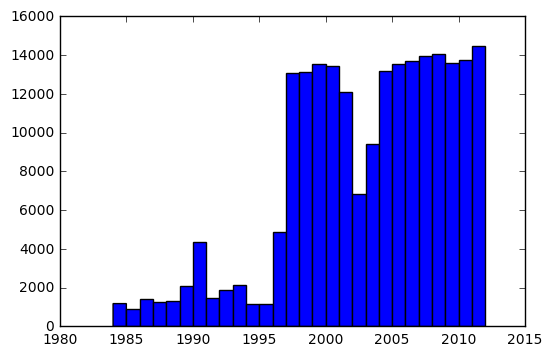

In [25]:
plt.hist(dates.dt.year, 28)

In [26]:
dates.dt.year.value_counts()

2008    14036
2007    13940
2010    13756
2006    13726
2009    13579
2005    13560
1999    13540
2000    13439
2011    13376
2004    13190
1998    13143
1997    13099
2001    12097
2003     9426
2002     6859
1996     4891
1990     4337
1993     2132
1989     2067
1992     1885
1991     1444
1986     1409
1988     1290
1987     1275
1984     1179
1995     1138
1994     1136
2012     1093
1985      888
Name: Air Date, dtype: int64

(array([ 21128.,  17501.,  19731.,  19654.,  21052.,  19331.,  15423.,
             0.,  16053.,  20510.,  25672.,  20875.]),
 array([  1.        ,   1.91666667,   2.83333333,   3.75      ,
          4.66666667,   5.58333333,   6.5       ,   7.41666667,
          8.33333333,   9.25      ,  10.16666667,  11.08333333,  12.        ]),
 <a list of 12 Patch objects>)

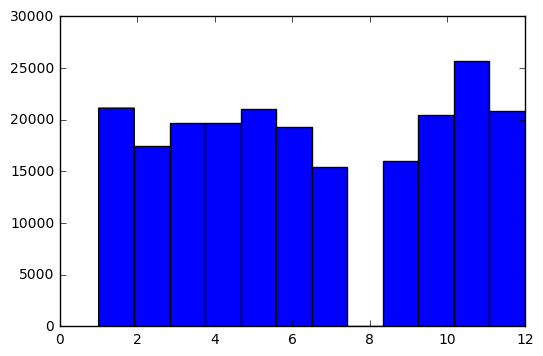

In [27]:
# New episodes of Jeopardy don't air in August
plt.hist(dates.dt.month, 12)

In [28]:
dates.dt.month.value_counts()

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: Air Date, dtype: int64

In [29]:
print max(df['Value'])
print min(df['Value'])

18000.0
5.0


(array([  9.04110000e+04,   6.15770000e+04,   3.35590000e+04,
          1.20460000e+04,   1.30330000e+04,   4.85000000e+02,
          8.59000000e+02,   2.22000000e+02,   4.00000000e+02,
          7.90000000e+01,   4.90000000e+01,   2.73000000e+02,
          3.10000000e+01,   9.50000000e+01,   2.10000000e+01,
          4.70000000e+01,   1.10000000e+01,   2.80000000e+01,
          8.00000000e+00,   1.40000000e+01,   1.00000000e+00,
          2.00000000e+00,   2.20000000e+01,   7.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  5.00000000e+00,   4.54875000e+02,   9.04750000e+02,
          1.35462500e+03,   1.80450000e+03,   2.25437500e+03,
          2.70425000e+03,   3.15412500e+03

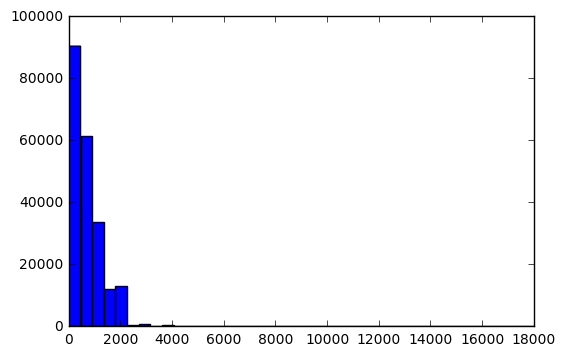

In [30]:
plt.hist(df['Value'].dropna(), 40)

## Doing a word count on the questions, answers, and categories

In [31]:
from collections import Counter

In [32]:
df['Question'].values[0] + ' ' + df['Question'].values[1]

"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves"

In [33]:
def word_counter(column, n):
    whole_column = ''
    
    for i in range(len(df[column].values)):
        whole_column += df[column].values[i]
        whole_column += ' '
    
    whole_column = whole_column.lower()
    word_count = Counter(whole_column.split())
    return word_count.most_common(n)

In [34]:
word_counter('Question', 100)

[('the', 170363),
 ('this', 123422),
 ('of', 112756),
 ('in', 102022),
 ('a', 86696),
 ('to', 50657),
 ('&', 45040),
 ('for', 35855),
 ('is', 33585),
 ('was', 29149),
 ('on', 25643),
 ('from', 19420),
 ('with', 17502),
 ('his', 16911),
 ('as', 16547),
 ('by', 15949),
 ('he', 14631),
 ('it', 14278),
 ('that', 14108),
 ('these', 13464),
 ('an', 12884),
 ('at', 12405),
 ("it's", 12348),
 ('one', 12171),
 ('name', 10612),
 ('or', 10051),
 ('first', 10010),
 ('you', 9870),
 ('"the', 9327),
 ('its', 8656),
 ('<a', 8416),
 ('are', 8286),
 ('who', 6968),
 ('be', 6506),
 ('when', 6215),
 ('her', 6174),
 ('has', 6005),
 ('named', 5650),
 ('2', 5487),
 ('city', 5471),
 ('called', 5435),
 ('and', 5308),
 ('about', 5254),
 ('have', 5121),
 ('seen', 5023),
 ('like', 4886),
 ('can', 4855),
 ('after', 4813),
 ('u.s.', 4762),
 ('new', 4739),
 ('but', 4691),
 ('i', 4688),
 ('she', 4674),
 ('type', 4589),
 ('not', 4530),
 ('clue', 4465),
 ('(<a', 4455),
 ('country', 4295),
 ('were', 4246),
 ('film', 4154

In [35]:
word_counter('Answer', 100)

[('the', 24963),
 ('a', 11958),
 ('of', 5240),
 ('&', 3332),
 ('john', 1805),
 ('and', 1578),
 ('an', 1532),
 ('new', 1187),
 ('"the', 1090),
 ('in', 1069),
 ('george', 1046),
 ('(or', 925),
 ('to', 806),
 ('william', 764),
 ('james', 742),
 ('king', 681),
 ('war', 655),
 ('henry', 596),
 ('on', 595),
 ('great', 566),
 ('red', 563),
 ('st.', 561),
 ('paul', 546),
 ('thomas', 538),
 ('robert', 535),
 ('sea', 506),
 ('richard', 498),
 ('i', 497),
 ('south', 493),
 ('de', 491),
 ('day', 462),
 ('david', 459),
 ('washington', 459),
 ('little', 453),
 ('charles', 446),
 ('city', 440),
 ('black', 439),
 ('or', 439),
 ('man', 438),
 ('mary', 437),
 ('white', 417),
 ('lake', 408),
 ('island', 405),
 ('blue', 392),
 ('queen', 389),
 ('jack', 383),
 ('york', 383),
 ('world', 374),
 ('peter', 358),
 ('bill', 355),
 ('louis', 353),
 ('san', 346),
 ('american', 345),
 ('north', 342),
 ('michael', 340),
 ('your', 337),
 ('for', 335),
 ('mexico', 332),
 ('jackson', 331),
 ('house', 323),
 ('river', 3

In [36]:
word_counter('Category', 100)

[('the', 32078),
 ('&', 12170),
 ('of', 8639),
 ('a', 7887),
 ('in', 7458),
 ('words', 4215),
 ('world', 4073),
 ('history', 3698),
 ('to', 3528),
 ('tv', 2941),
 ('on', 2878),
 ('u.s.', 2584),
 ('you', 2565),
 ('american', 2337),
 ('century', 2318),
 ('names', 2213),
 ('science', 2184),
 ('i', 2026),
 ('time', 1968),
 ('for', 1956),
 ('with', 1951),
 ('sports', 1930),
 ('state', 1924),
 ('music', 1856),
 ('movie', 1851),
 ('it', 1817),
 ('your', 1781),
 ('movies', 1740),
 ('literature', 1541),
 ("it's", 1539),
 ('food', 1444),
 ('name', 1442),
 ('women', 1441),
 ('geography', 1434),
 ('by', 1433),
 ('literary', 1420),
 ('that', 1411),
 ('famous', 1383),
 ('art', 1356),
 ('new', 1353),
 ('people', 1337),
 ('from', 1336),
 ('my', 1322),
 ('me', 1319),
 ('cities', 1302),
 ('authors', 1240),
 ('first', 1176),
 ('clues', 1164),
 ("let's", 1156),
 ('is', 1156),
 ('rhyme', 1154),
 ('all', 1126),
 ('historic', 1108),
 ('crossword', 1106),
 ('characters', 1099),
 ('what', 1062),
 ('war', 1059)

### Exploring CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [38]:
cvec = CountVectorizer(stop_words='english', max_features=1000)

In [39]:
cvec.fit_transform(df['Category'].values)

<216930x1000 sparse matrix of type '<type 'numpy.int64'>'
	with 260210 stored elements in Compressed Sparse Row format>

In [40]:
words  = pd.DataFrame(cvec.transform(df['Category'].values).todense(),
             columns=cvec.get_feature_names())

words.transpose().sort_values(0, ascending=False).head(10).transpose()

,history,10,party,original,origins,oscar,oscars,pacific,page,painters
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
